Mount drive.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Pandas.

In [51]:
import pandas as pd

Make dataframe of given CSV file.

In [52]:
df = pd.read_csv('/content/drive/MyDrive/WoC\'23/Mid-evaluation/weather.csv')
df = pd.DataFrame(df)
# df

Using Pandas to remove rows with NULL value and making dummy columns

In [54]:
df = df.dropna()
dummy = pd.get_dummies(df['weather']) # Get dummy columns of the data present in weather column
merged = pd.concat([df,dummy], axis=1) # merge df and merge dataframes
merged

,precipitation,temp_max,temp_min,wind,weather,drizzle,fog,rain,snow,sun
0,0.0,12.8,5.0,4.7,drizzle,1,0,0,0,0
1,10.9,10.6,2.8,4.5,rain,0,0,1,0,0
2,0.8,11.7,7.2,2.3,rain,0,0,1,0,0
3,20.3,12.2,5.6,4.7,rain,0,0,1,0,0
4,1.3,8.9,2.8,6.1,rain,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,0,0,1,0,0
1457,1.5,5.0,1.7,1.3,rain,0,0,1,0,0
1458,0.0,7.2,0.6,2.6,fog,0,1,0,0,0
1459,0.0,5.6,-1.0,3.4,sun,0,0,0,0,1


Analizing data with the help of seaborn graphs

In [55]:
# Import required libraries to plot the graph
import seaborn as sb
from matplotlib import pyplot as plt

Effect of temprature on different weather conditions

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Temperature'), Text(0.5, 0, 'Weather condition')]

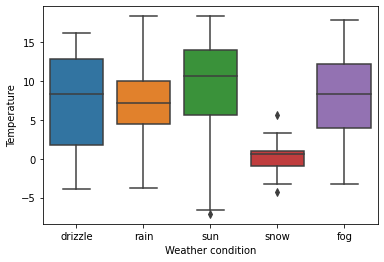

In [56]:
g1 = sb.boxplot(merged.weather, merged.temp_min)
g1.set(xlabel='Weather condition', ylabel = 'Temperature')

Effect of wind speed on different weather conditions

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Wind'), Text(0.5, 0, 'Weather condition')]

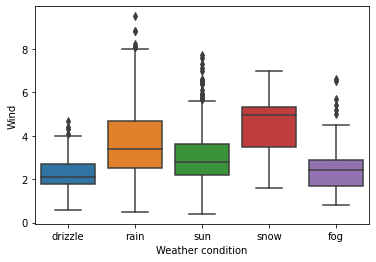

In [57]:
g1 = sb.boxplot(merged.weather, merged.wind)
g1.set(xlabel='Weather condition', ylabel = 'Wind')

Import required libraries for the model training.

In [58]:
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression as LR

In [59]:
x = merged[merged.columns[0:4]] # Independent data
y = merged['weather'] # Dependent data

Split the data into four parts with train_test_split function

In [67]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.1)

Train the model with the fit function of LogisticRegression class
 

In [ ]:
model = LR(multi_class='multinomial').fit(x_train, y_train)
ans = model.predict(x_test) # GIves the predicted weather dependent of the data of x_test
ans

In [69]:
model.score(x_test, y_test) # Gives the accuracy of the model

0.8503401360544217

Plotting confution matrix for better understanding of the test results.

[Text(33.0, 0.5, 'True'), Text(0.5, 15.0, 'Predicted')]

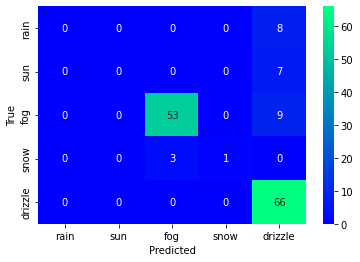

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ans)

# Get labels in confusion matrix
def plot(y_test, ans):
  labels = y_test.unique()
  table = pd.DataFrame(cm, columns=labels, index=labels)
  sns_table = sb.heatmap(table, annot=True, fmt='d', cmap='winter')
  return sns_table

conf_mat = plot(y_test, ans)
conf_mat.set(xlabel='Predicted', ylabel='True')